##### Step 1: Load Your Data.

In [2]:
import pandas as pd

In [3]:
data=pd.read_csv("your data_path")

##### Step 2: Calculate MA for each 4 Quarters and then Center them.

In [4]:
data['MA4']=data['Sales(1000)'].rolling(window=4,center=True).mean()

In [5]:
data['CMA']=(data['MA4']+data['MA4'].shift(-1))/2

##### Step 3: Calculate Seasonal Indices(SI) and get seasonal component values.

In [6]:
data['SI']=data['Sales(1000)']/data['CMA']

In [7]:
seasonal_indices=data.groupby('Quarter')['SI'].mean()
data['S_t']=data['Quarter'].map(seasonal_indices)

##### Step 4: Deseasonalize the Data.

In [8]:
data['Deseasonalized']=data['Sales(1000)']/data['S_t']

##### Step 5: Add a time variable for Trend Analysis.

In [9]:
data['t']=range(1,len(data)+1)

##### Step 6: Perform a Linear Trend Analysis.

In [10]:
from sklearn.linear_model import LinearRegression
X=data[['t']]
Y=data['Deseasonalized']
model=LinearRegression().fit(X,Y)
data['Trend']=model.predict(X)

##### Step 7: Forecasting.

In [18]:
import numpy as np
forecast_period=4   #Forecasting 4 periods ahead.
future_t=np.arange(data['t'].max()+1,data['t'].max()+1+forecast_period)
future_t_df=pd.DataFrame(future_t,columns=['t']) # Convert to DataFrame with same column name as that in fitting
future_trend=model.predict(future_t_df)
future_seasonality=data['S_t'][:forecast_period].values
forecast=future_trend*future_seasonality

##### Step 8: Visualization.

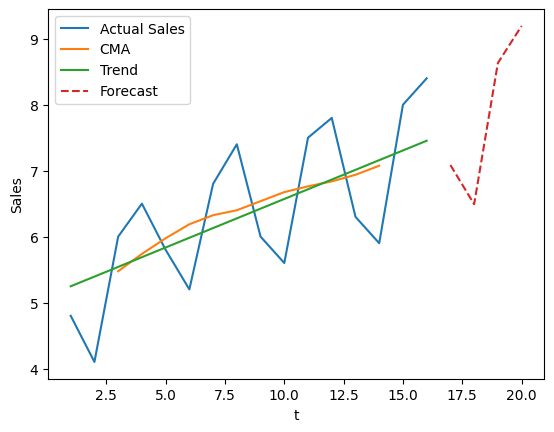

In [19]:
import matplotlib.pyplot as plt
plt.plot(data['t'],data['Sales(1000)'], label='Actual Sales')
plt.plot(data['t'], data['CMA'],label='CMA')
plt.plot(data['t'],data['Trend'], label='Trend')
plt.plot(future_t,forecast,label='Forecast', linestyle='--')
plt.xlabel('t')
plt.ylabel('Sales')
plt.legend()
plt.show()

-----------

##### Step 9:Check for Accuracy.

In [13]:
data['Forecasted']=data['S_t']*data['Trend']

In [14]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
Actual=data['Sales(1000)'].dropna()
Forecasted=data['Forecasted'].dropna()

In [15]:
#Calculate MAE
mae=mean_absolute_error(Actual,Forecasted)
#Calculate MSE
mse=mean_squared_error(Actual,Forecasted)
#Calculate RMSE
rmse=np.sqrt(mse)
#Calculate MAPE(use numpy to avoid division by zero issues)
mape=np.mean(np.abs((Actual-Forecasted)/Actual))*100

In [16]:
print('Mean Absolute Error (MAE) is:',mae)
print('Mean Squared Error (MSE) is:',mse)
print('Root Mean Squared Error (RMSE) is:',rmse)
print('Mean Absolute Percentage Error (MAPE) is:',mape)

Mean Absolute Error (MAE) is: 0.13879273641557638
Mean Squared Error (MSE) is: 0.03302109709058803
Root Mean Squared Error (RMSE) is: 0.1817170797987576
Mean Absolute Percentage Error (MAPE) is: 2.4395328407222077


##### Interpretation.

The metrics indicate a well-performing model, implying that forecasted values are close to the actual data. Here is a quick interpretation:
- **Mean Absolute Error (MAE)** of 0.139: It measures the average absolute errors between predicted and actual values. A low MAE means less error, which is a positive sign.
- **Mean Squared Error (MSE)** of 0.033: It emphasizes larger errors due to squaring. Therefore, a low MSE is also good because it shows errors are small.
- **Root Mean Squared Error (RMSE)** of 0.182: As the square root of MSE, it keeps the units consistent with the data, making it easier to interpret. Low RMSE reflects better accuracy.
- **Mean Absolute Percentage Error (MAPE)** of 2.439%: This indicates that, on average, the forecast deviates by 2.439% from actual values. It's typicaly quite good.